# Practica 2 (Opcion 2 Stroke)

<img src="https://www.neuraldojo.org/media/bg_stroke.jpeg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="100%"/>


### **Nombre Alumno:**

**Contexto**

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular (**stroke**) es la segunda causa de muerte en todo el mundo, responsable de aproximadamente el 11% del total de muertes.
Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de los parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

## Información del dataset

1. id: identificador único
2. gender: "Masculino", "Femenino" u "Otro"
3. age: edad del paciente
4. hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión
5. heart_disease: 0 si el paciente no tiene ninguna enfermedad del corazón, 1 si el paciente tiene una enfermedad del corazón
6. ever_married: "No" o "Sí"
7. work_type: "niños", "Govt_jov", "Never_worked", "Private" o "Self-employment"
8. Residence_type: "Rural" o "Urban"
9. avg_glucose_level: nivel promedio de glucosa en sangre
10. IMC: índice de masa corporal
11. smoking_status: "anteriormente fumó", "nunca fumó", "fuma" o "Desconocido"*
12. stroke: 1 si el paciente tuvo un stroke o 0 en caso contrario

*Nota: "Desconocido" en smoking_status significa que la información no está disponible para este paciente*

##Objetivo de la practica

- Parte 1. En un Notebook construya un modelo para predecir la probabilidad de que un paciente sufra un accidente cerebrovascular.
- Parte 2. Publique y comparta su Notebook en [Github.com](https://www.github.com)
- Parte 3. En base al trabajo desarrollado y los hallazasgos redacte, publique y comparta un articulo en [medium.com](https://www.medium.com)

##Criterios de Evaluación

Parte 1.

- Seguir todos los pasos de un proceso ML:
    - Identificación del Problema
    - Importación de datos
    - EDA
    - Modelado (probar al menos tres algoritmos)
    - Evaluación (al menos dos métricas)
    - Hypertunning con Gridsearch
    - Selección del Modelo
    - Resultados y Conclusiones

- Todo el código del proyecto esté contenido en un cuaderno o script de Jupyter o Google Colab. 
- Demuestre una ejecución y salida exitosas del código, sin errores.
- Escriba código que esté bien documentado y use funciones y clases según sea necesario.

Parte 2.

El repositorio en Github debe conteener:
- El cuaderno *.ipynb
- README.md, que explique el problema, una descripcion del dataset, requerimientos y librerias para la correcta ejecución del codigo, Resultados y conclusiones
- Licencia del codigo

Parte 3.

El articulo en medium debera contener las siguientes secciones:

- Introduccion
- Problema
- Analisis Exploratorio explicando aspectos relevantes de lo encontrado
- Modelado ML
- Evaluación y Hipertunning
- Resultados y Conclusiones
- Incluir referencia on enlace al codigo disponible en su cuenta github.

##Dataset

Puede descargar el dataset aqui: https://neuraldojo.org/media/stroke/archive.zip

##Método de Entrega del trabajo:

Enviar e mi correo: necrus.aikon@gmail.com, Asunto: Practica 2 (Stroke) los siguiente:
- Enlace o archivo adjunto del codigo en colab
- Enlace github
- Enlace medium

  




IDENTIFICACION DEL PROBLEMA

El problema pide identificar posibles razones o los factores que mas pueden afectar a un accidente cerebrovascular, se tiene un dataframe con distintos datos el cual sera analizado y prcesado por distintos modelos

# **1. IMPORTACION DE LIBRERIAS Y DE LA DATA**

In [1]:
#Importamos Librerias
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#importamos el Dataset
!wget https://neuraldojo.org/media/stroke/archive.zip
!unzip archive.zip
#La Herramienta no descomprimia el zip se lo añadio manualmente 

--2022-04-13 16:48:42--  https://neuraldojo.org/media/stroke/archive.zip
Resolving neuraldojo.org (neuraldojo.org)... 143.95.32.198
Connecting to neuraldojo.org (neuraldojo.org)|143.95.32.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69007 (67K) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]  67.39K   203KB/s    in 0.3s    

2022-04-13 16:48:43 (203 KB/s) - ‘archive.zip’ saved [69007/69007]

Archive:  archive.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# **2. ANALISIS DE LOS DATOS (EDA)**


### **2.1 Inspeccion y Manipulacion de los Datos**

In [4]:
df.head()
# Mostramos los primeros datos del DataFrame

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape
# Mostramos las Filas y Columnas

(5110, 12)

In [6]:
df['stroke'].unique()
# Se muestra los datos que tiene la columna stroke

array([1, 0])

In [7]:
df.info
# Se muestra los tipos de Datos

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

In [8]:
df.describe().T
#Se Muestra el Resumen estadisticos del DataFrame

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## **2.2 Verificacion de Valores Nulos**

In [9]:
df.isnull().sum()
#Mostramos si existen valores Nulos

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
df1 = df.dropna()
#Se prefiria dejar el dataset sin modificar, en cambio se creo un nuevo datasets df1 ya con la elimninacion de los valores nulos

In [11]:
df1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [12]:
df1.isnull().sum()
#Ya no se tiene valores Nulos

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
df1.shape
#Se eliminaron 61 filas que contenian valores nulos

(4909, 12)

## **2.3 Distribucion y Correlacion de Datos**

In [14]:
dist = df1['stroke'].value_counts()
print(dist)

0    4700
1     209
Name: stroke, dtype: int64


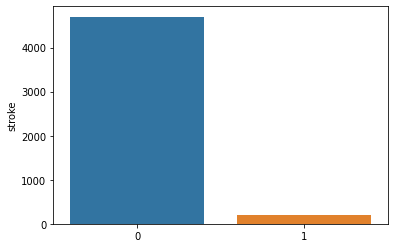

In [15]:
sns.barplot(x = dist.index, y= dist)
#Mostrando graficos de Barras para la cantidad de casos stroke

In [16]:
df1.corr()
#Exsite una correlacion con la edad, menor correlacion con las demas variables

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.008984,0.001147,0.004016,0.006409,0.003084,0.004839
age,0.008984,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.001147,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.004016,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.006409,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.004839,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


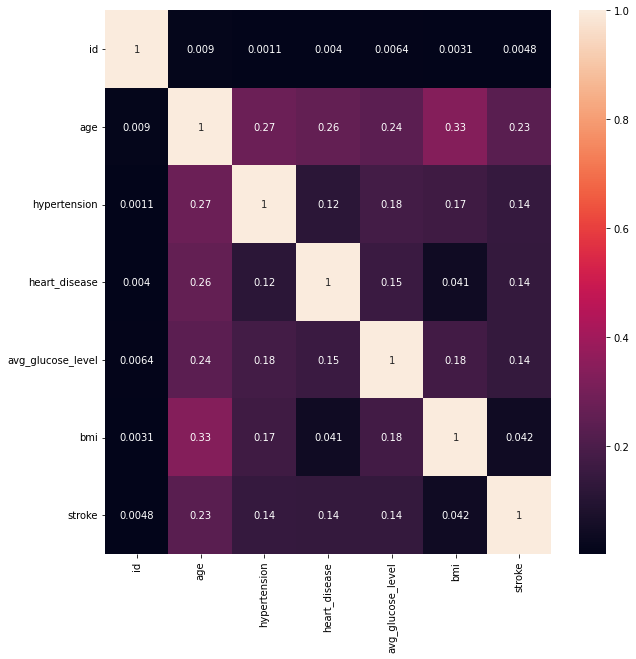

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot = True)
# Mostrando la Correlacion de Datos mediante un Heat Map

In [18]:
high_corr = df1.corr().abs()
high_corr.unstack().sort_values(ascending = False)

id                 id                   1.000000
age                age                  1.000000
bmi                bmi                  1.000000
avg_glucose_level  avg_glucose_level    1.000000
hypertension       hypertension         1.000000
heart_disease      heart_disease        1.000000
stroke             stroke               1.000000
bmi                age                  0.333398
age                bmi                  0.333398
hypertension       age                  0.274425
age                hypertension         0.274425
                   heart_disease        0.257123
heart_disease      age                  0.257123
avg_glucose_level  age                  0.235838
age                avg_glucose_level    0.235838
                   stroke               0.232331
stroke             age                  0.232331
avg_glucose_level  hypertension         0.180543
hypertension       avg_glucose_level    0.180543
bmi                avg_glucose_level    0.175502
avg_glucose_level  b

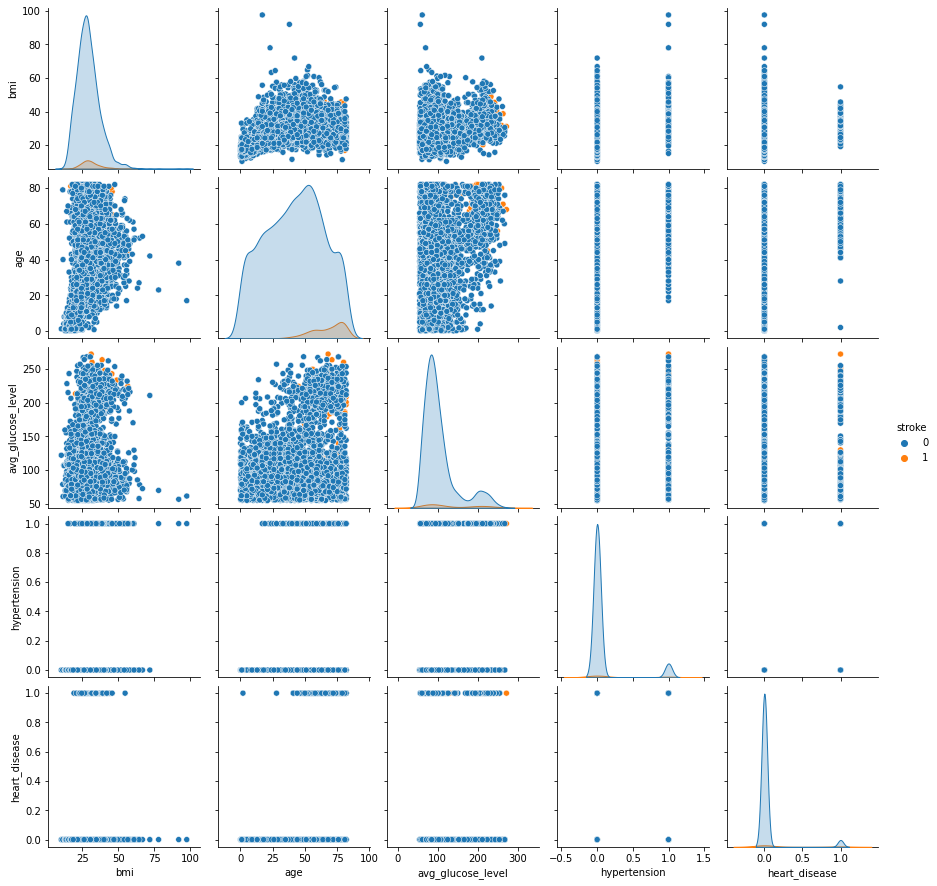

In [19]:
sns.pairplot(data = df1[['stroke','bmi','age','avg_glucose_level','hypertension','heart_disease']], hue = 'stroke')

## **2.4 Division de nuestros datos en Train, Validacion y Test**

In [20]:
df1.shape

(4909, 12)

In [36]:
df2 = df1.drop(columns = ['gender', 'Residence_type', 'work_type', 'id', 'ever_married'])
df2.head()
#se elimino las columnas que no aportaban informacion de importancia para el problema a solucionar

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,228.69,36.6,formerly smoked,1
2,80.0,0,1,105.92,32.5,never smoked,1
3,49.0,0,0,171.23,34.4,smokes,1
4,79.0,1,0,174.12,24.0,never smoked,1
5,81.0,0,0,186.21,29.0,formerly smoked,1


In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2['smoking_status'] = labelencoder.fit_transform(df2['smoking_status'])

In [44]:
df2.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,228.69,36.6,1,1
2,80.0,0,1,105.92,32.5,2,1
3,49.0,0,0,171.23,34.4,3,1
4,79.0,1,0,174.12,24.0,2,1
5,81.0,0,0,186.21,29.0,1,1


In [47]:
df2['smoking_status'].unique()

array([1, 2, 3, 0])

In [48]:
df_test = df2.iloc[-1409:,]
df_valid = df2.iloc[0:3500,:]
#Se dividio los datos Manualmente 

In [49]:
df_valid.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,228.69,36.6,1,1
2,80.0,0,1,105.92,32.5,2,1
3,49.0,0,0,171.23,34.4,3,1
4,79.0,1,0,174.12,24.0,2,1
5,81.0,0,0,186.21,29.0,1,1


In [50]:
X = df_valid.iloc[:,:-1]
#Se elimina la Columna stroke reando la variable X

In [51]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,2
3,49.0,0,0,171.23,34.4,3
4,79.0,1,0,174.12,24.0,2
5,81.0,0,0,186.21,29.0,1


In [52]:
y = df_valid['stroke']

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size=0.3)

In [54]:
print(X_train)

       age  hypertension  heart_disease  avg_glucose_level   bmi  \
905   31.0             0              0              76.26  35.6   
874   80.0             0              0              56.99  26.7   
943   75.0             0              0              86.40  42.6   
1361  59.0             0              0              89.96  28.1   
457   33.0             1              0              74.44  45.2   
...    ...           ...            ...                ...   ...   
890   80.0             1              1              84.31  30.3   
3421  51.0             0              0              85.59  30.5   
1746  24.0             1              0              80.63  28.2   
2733   9.0             0              0             142.68  24.4   
2865  58.0             0              0              69.24  27.6   

      smoking_status  
905                2  
874                2  
943                2  
1361               0  
457                3  
...              ...  
890                3  



```

```

# **3.  MODELADO**

### **3.1 MODELO POR KNN **

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
# Se decide usar un KNN de 3 debido a que la cantidad de datos no es muy amplia

KNeighborsClassifier()

In [56]:
scores = []
for n_neighbors in range(1,9):
  knn = KNeighborsClassifier(n_neighbors = n_neighbors)
  knn.fit(X,y)  
  scores.append(knn.score(X_valid, y_valid))

[1.0, 0.9523809523809523, 0.9485714285714286, 0.9476190476190476, 0.9476190476190476, 0.9438095238095238, 0.9447619047619048, 0.9419047619047619]


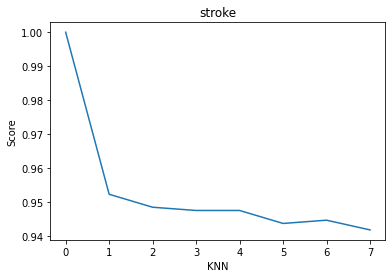

In [57]:
plt.plot(scores)
plt.title("stroke")
plt.xlabel("KNN")
plt.ylabel("Score")
print(scores)

In [58]:
print('Score Train',knn.score(X_train,y_train))
print('Score Validation',knn.score(X_valid,y_valid))
print('Score Test',knn.score(df_test.iloc[:,:-1], df_test['stroke']))
#Mostrando los valores de de Score

Score Train 0.9395918367346939
Score Validation 0.9419047619047619
Score Test 0.9964513839602555


In [59]:
n_neighbors = [3,5,7,10,15,20]
d_scores = {}

for value in n_neighbors:
  knn = KNeighborsClassifier(n_neighbors=value)
  knn.fit(X,y)
  scores = []
  scores.append(knn.score(X_train, y_train))
  scores.append(knn.score(X_valid, y_valid))
  scores.append(knn.score(df_test.iloc[:,:-1], df_test['stroke']))
  d_scores[value] = scores

In [60]:
results = pd.DataFrame(d_scores).transpose().reset_index() 
results.colums = ['n_neighbors', 'train', 'validation', 'test']
results
#se realiza la impresion de las tablas y la mayoria de los valores son altos siendo que n=10 puede ser el valor mas alto

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,index,0,1,2
0,3,0.950612,0.948571,0.977289
1,5,0.941224,0.947619,0.985806
2,7,0.940816,0.944762,0.990064
3,10,0.940000,0.942857,0.997161
4,15,0.940000,0.944762,0.997161
5,20,0.939184,0.942857,1.000000


# REALIZAMOS PREDICCIONES

In [128]:
res = knn.predict(df_test.iloc[:,:-1])
#Se predice los resultados para los datos no trabajados

In [142]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
print(res)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# **3.2 MODELADO POR ARBOLES DE DESICION**

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [69]:
#Imprimimos Scores
print("Train Score:", clf_dt.score(X_train,y_train))
print("Validation Score:", clf_dt.score(X_valid,y_valid))
print("Test Score:", clf_dt.score(df_test.iloc[:,:-1], df_test['stroke']))

Train Score: 1.0
Validation Score: 0.8866666666666667
Test Score: 0.9354151880766501


In [70]:
clf_dt = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf = 5)
clf_dt.fit(X_train, y_train)

print("Train Score:", clf_dt.score(X_train,y_train))
print("Validation Score:", clf_dt.score(X_valid,y_valid))
print("Test Score:", clf_dt.score(df_test.iloc[:,:-1], df_test['stroke']))

Train Score: 0.9457142857142857
Validation Score: 0.9342857142857143
Test Score: 0.985805535841022


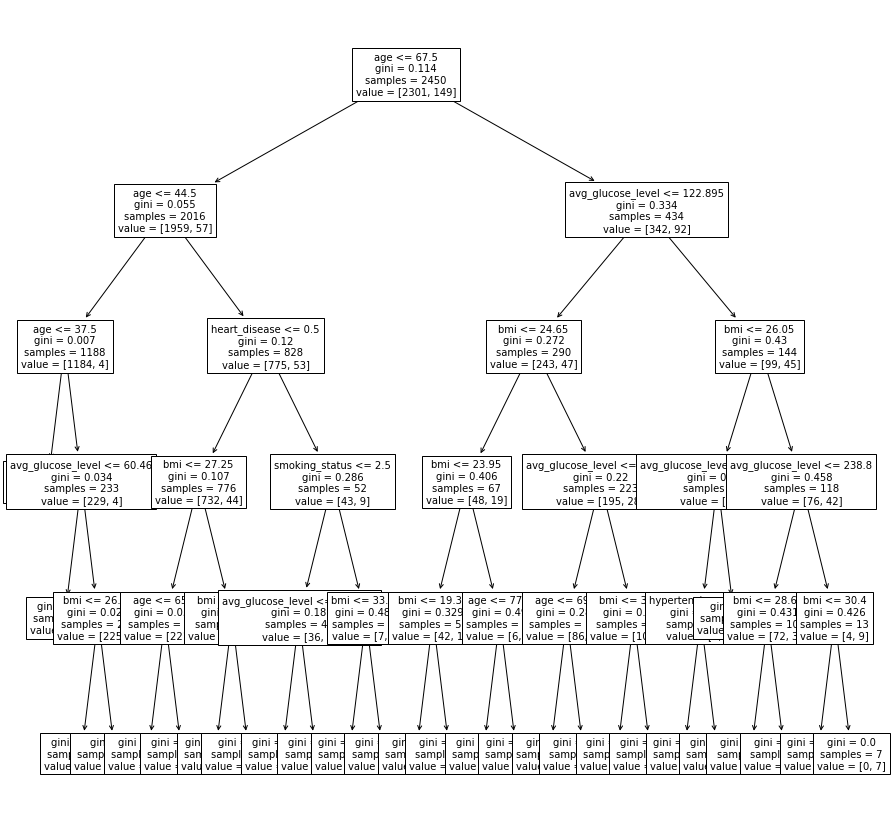

In [71]:
#dibujemos el árbol
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(clf_dt, feature_names=X.columns, fontsize=10)
plt.show()

In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = clf_dt, X = X_train, y = y_train, cv = 5)
scores

array([0.93265306, 0.93469388, 0.93877551, 0.94285714, 0.94081633])

In [73]:
scores.mean()

0.9379591836734693

# **3.3 MODELADO POR REGRESION LOGISTICA**

In [74]:
#Importamos las librerias
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [75]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=0, ).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [76]:
#Score para entrenamiento
clf_log.score(X_train,y_train)

0.9391836734693878

In [77]:
#Score para validacion
clf_log.score(X_valid,y_valid)

0.9438095238095238

In [80]:
#ajustamos parametros de maximas iteraciones, el parametro de regularizacion C
from sklearn.linear_model import LogisticRegression

clf_log2 = LogisticRegression(random_state=0, max_iter=10000, solver='lbfgs', penalty= 'l2', C =0.10).fit(X_train, y_train)
print("Training Score:",clf_log2.score(X_train,y_train))
print("Validation Score:",clf_log2.score(X_valid,y_valid))
print("Test Score:", clf_dt.score(df_test.iloc[:,:-1], df_test['stroke']))

Training Score: 0.9391836734693878
Validation Score: 0.9438095238095238
Test Score: 0.985805535841022


#4.- Evaluación de Métricas

##4.1 Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = clf_dt, X = X_train, y = y_train, cv = 5)
scores

array([0.93265306, 0.93469388, 0.93877551, 0.94285714, 0.94081633])

##4.2 Matriz de Confusion

In [91]:
clf_dt.classes_

array([0, 1])

[[1389   20]
 [   0    0]]


Text(0.5, 1.0, 'Confusion Matrix Income Dataset')

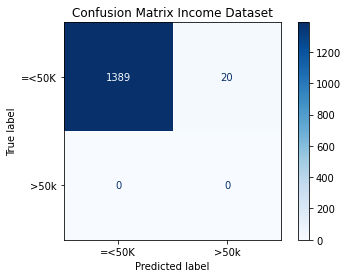

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

data_confusion = confusion_matrix(y_true = df_test['stroke'], y_pred = clf_dt.predict(df_test.iloc[:,:-1]))

target_names = ['=<50K', '>50k']

disp = ConfusionMatrixDisplay.from_estimator(clf_dt, X = df_test.iloc[:,:-1], y = df_test['stroke'], cmap = plt.cm.Blues, display_labels=target_names)
print(data_confusion)
disp.ax_.set_title("Confusion Matrix Income Dataset")

In [97]:
vn, fn, fp, vp = data_confusion.ravel()
print(vp,fp,fn,vn)

0 0 20 1389


##4.3 Accuracy

$$Accuracy=\frac{VP+VN}{VP+VN+FP+FN}$$

In [98]:
accuracy = (vp+vn)/(vp+vn+fp+fn)
print("Accuracy:",accuracy)

Accuracy: 0.985805535841022


In [100]:
print(clf_dt.score(df_test.iloc[:,:-1], df_test['stroke']))

0.985805535841022


## 4.4 Precision

$$Precision = \frac{VP}{VP+FP}$$


In [101]:
precision = vp/(vp+fp)
print("Precision:",precision)

Precision: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


##4.5 Recall
$$Recall = \frac{VP}{VP+FN}$$

In [102]:
recall = vp/(vp+fn)
print("Recall:",recall)

Recall: 0.0


## 4.6 Especificidad
$$Specifity = \frac{VN}{VN+FP}$$

In [103]:
specifity = vn/(vn+fp)
print("Especificidad:", specifity)

Especificidad: 1.0


##4.7 F1-Score
$$F1 Score = \frac{2VP}{2VP+FP+FN}$$

In [104]:
F1_score = 2*vp/(2*vp+fp+fn)
print("F1 Score:", F1_score)

F1 Score: 0.0


##4.8 Reporte de Metricas

In [105]:
from sklearn.metrics import classification_report
target_names = ['=<50K', '>50k']
print(classification_report(y_true = df_test['stroke'], y_pred = clf_dt.predict(df_test.iloc[:,:-1]), target_names=target_names))

              precision    recall  f1-score   support

       =<50K       1.00      0.99      0.99      1409
        >50k       0.00      0.00      0.00         0

    accuracy                           0.99      1409
   macro avg       0.50      0.49      0.50      1409
weighted avg       1.00      0.99      0.99      1409



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#5.- Hipertunning con Gridsearch

In [106]:
clf_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5)

In [107]:
model_params = {
    'max_depth': [3,5,7,9,12],
    'min_samples_leaf': [3,5,7],
    'min_samples_split':[3,5,7]
}

In [108]:
#instanciamos el clasificador y asignamos los paremtros
clf_dt_ = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
clf_grid = GridSearchCV(clf_dt_,model_params, cv = 5)
clf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12],
                         'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [3, 5, 7]})

In [109]:
print(clf_grid.best_estimator_.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [110]:
#entrenando con los mejores parametros
clf_dt_best = DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 5, min_samples_split = 3 )
clf_dt_best.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, min_samples_split=3)

In [111]:
#Imprimimos Scores
print("Train Score:", clf_dt_best.score(X_train,y_train))
print("Validation Score:", clf_dt_best.score(X_valid,y_valid))
print("Test Score:", clf_dt_best.score(df_test.iloc[:,:-1], df_test['stroke']))

Train Score: 0.9522448979591837
Validation Score: 0.9161904761904762
Test Score: 0.9694819020581973


# 6. **MODELO**

Se comprobo que en los tres modelos que se uso para evaluar los datos daba score de train, validation y test altos valores. Los datos sin tener correlacion muy alta se determina hacer un analisis de los datos mejor correlacionados.

In [112]:
df_no_stroke = df2[df2['stroke'] == 0]
df_stroke = df2[df2['stroke'] == 1]

In [113]:
df_no_stroke[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,4700.000000,4700.000000,4700.000000
mean,41.760451,104.003736,28.823064
std,22.268129,42.997798,7.908287
min,0.080000,55.120000,10.300000
25%,24.000000,76.887500,23.400000
50%,43.000000,91.210000,28.000000
75%,59.000000,112.432500,33.100000
max,82.000000,267.760000,97.600000


In [114]:
df_stroke[['age','avg_glucose_level','bmi']].describe()

,age,avg_glucose_level,bmi
count,209.000000,209.000000,209.000000
mean,67.712919,134.571388,30.471292
std,12.402848,62.462047,6.329452
min,14.000000,56.110000,16.900000
25%,58.000000,80.430000,26.400000
50%,70.000000,106.580000,29.700000
75%,78.000000,196.920000,33.700000
max,82.000000,271.740000,56.600000


### CORRELACION DE STROKE VS **EDAD**

In [120]:
import plotly.figure_factory as ff

hist_data = [df_stroke['age'], df_no_stroke['age']]

group_labels = ['stroke age', 'no stroke age']

fig = ff.create_distplot(hist_data, group_labels, bin_size=5, show_rug=False)
fig.update_layout(title_text='Edades de víctimas y no víctimas')

fig.show()

### CORRELACION DE STROKE VS **GLUCOSA**

In [119]:
hist_data = [df_stroke['avg_glucose_level'], df_no_stroke['avg_glucose_level']]

group_labels = ['stroke avg_glucose_level', 'no stroke avg_glucose_level']

fig = ff.create_distplot(hist_data, group_labels, bin_size=10, show_rug=False)
fig.update_layout(title_text='Niveles de glucosa de de víctimas y no víctimas')

fig.show()

### CORRELACION DE STROKE VS **INDICE DE MASA CORPORAL**

In [121]:
hist_data = [df_stroke['hypertension'].dropna(), df_no_stroke['bmi'].dropna()]

group_labels = ['stroke bmi', 'no stroke bmi']

fig = ff.create_distplot(hist_data, group_labels, bin_size=5, show_rug=False)
fig.update_layout(title_text='Bmi de víctimas y no víctimas')

fig.show()

## **7. RESULTADOS**

SEGUN LOS DATOS OBTENIDOS LAS PRINCIPALES FACTORES ASOCIADOS A UN ATAQUE CEREBRO VASCULAR SON LA EDAD, IMC, GLUCOSA E HIPERTENSION, SIN EMBRAGO LOS VALORES QUE PRESENTAN NO PODRIAN ASOCIARLOS DE MANERA DIRECTA A STROKE, LOS RESULTADO DE LAS PREDICCIONES EN DATOS CRUDOS UNA MUY BAJA PROBABILIDAD DE QUE UNA PERSONA SUFRA UN ATAQUE CEREBROVASCULAR, APESAR DE QUE EXITAN LOS FACTORES RELACIONADOS MENCIONADOS EN ANTERIORIDAD